In [34]:
from nltk.corpus import gutenberg, brown, inaugural
import pandas as pd
%matplotlib inline

In [7]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [10]:
whitmanWords = gutenberg.words('whitman-leaves.txt')

In [11]:
len(whitmanWords)

154883

In [14]:
# This creates a list of lists, with all the tokens for all the texts
allTokens = []
for fileid in gutenberg.fileids():
    allTokens.append(gutenberg.words(fileid))

In [15]:
len(allTokens)

18

In [18]:
for wordList in allTokens: 
    print(len(wordList))

192427
98171
141576
1010654
8354
55563
18963
34110
96996
86063
69213
210663
260819
96825
25833
37360
23140
154883


In [19]:
tokensDict = {}
for fileid in gutenberg.fileids(): 
    tokensDict[fileid] = gutenberg.words(fileid)

In [21]:
len(tokensDict['austen-emma.txt'])

192427

In [23]:
tokensDict = {}
for fileid in gutenberg.fileids():
    tokensDict[fileid] = {"tokens": gutenberg.words(fileid),
                          "numTokens": len(gutenberg.words(fileid))}

In [29]:
allLengths = {}
for fileid in gutenberg.fileids():
    allLengths[fileid[:-4]] = len(gutenberg.words(fileid))

In [30]:
allLengths

{'austen-emma': 192427,
 'austen-persuasion': 98171,
 'austen-sense': 141576,
 'bible-kjv': 1010654,
 'blake-poems': 8354,
 'bryant-stories': 55563,
 'burgess-busterbrown': 18963,
 'carroll-alice': 34110,
 'chesterton-ball': 96996,
 'chesterton-brown': 86063,
 'chesterton-thursday': 69213,
 'edgeworth-parents': 210663,
 'melville-moby_dick': 260819,
 'milton-paradise': 96825,
 'shakespeare-caesar': 25833,
 'shakespeare-hamlet': 37360,
 'shakespeare-macbeth': 23140,
 'whitman-leaves': 154883}

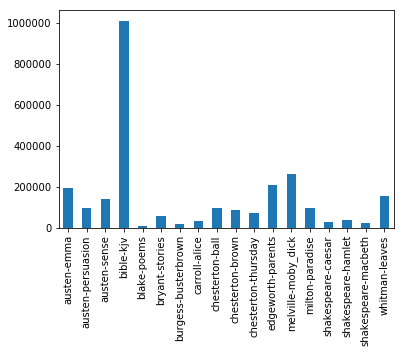

In [35]:
pd.Series(allLengths).plot(kind='bar')

# Type-token ratio

"the the the the that's all folks!" 
 - 9 tokens
 - 6 types

Type/token ratio: 6/9

In [38]:
porkyWords = "the the the the that's all folks!".split()
porkyWords

['the', 'the', 'the', 'the', "that's", 'all', 'folks!']

In [39]:
set(porkyWords)

{'all', 'folks!', "that's", 'the'}

In [40]:
def typeTokenRatio(tokens): 
    numTypes = len(set(tokens))
    numTokens = len(tokens)
    return numTypes/numTokens

In [41]:
ttrs = {}
for fileid in gutenberg.fileids():
    tokens = gutenberg.words(fileid)
    ttrs[fileid] = typeTokenRatio(tokens)

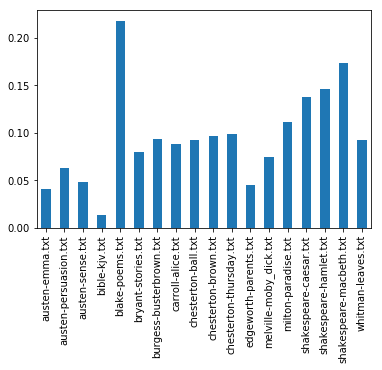

In [43]:
pd.Series(ttrs).plot(kind='bar')

In [48]:
allLengths

{'austen-emma': 192427,
 'austen-persuasion': 98171,
 'austen-sense': 141576,
 'bible-kjv': 1010654,
 'blake-poems': 8354,
 'bryant-stories': 55563,
 'burgess-busterbrown': 18963,
 'carroll-alice': 34110,
 'chesterton-ball': 96996,
 'chesterton-brown': 86063,
 'chesterton-thursday': 69213,
 'edgeworth-parents': 210663,
 'melville-moby_dick': 260819,
 'milton-paradise': 96825,
 'shakespeare-caesar': 25833,
 'shakespeare-hamlet': 37360,
 'shakespeare-macbeth': 23140,
 'whitman-leaves': 154883}

In [49]:
allLengths.items()

dict_items([('austen-emma', 192427), ('austen-persuasion', 98171), ('austen-sense', 141576), ('bible-kjv', 1010654), ('blake-poems', 8354), ('bryant-stories', 55563), ('burgess-busterbrown', 18963), ('carroll-alice', 34110), ('chesterton-ball', 96996), ('chesterton-brown', 86063), ('chesterton-thursday', 69213), ('edgeworth-parents', 210663), ('melville-moby_dick', 260819), ('milton-paradise', 96825), ('shakespeare-caesar', 25833), ('shakespeare-hamlet', 37360), ('shakespeare-macbeth', 23140), ('whitman-leaves', 154883)])

In [56]:
truncatedTokens = {}
for key, tokens in tokensDict.items(): 
    truncated = tokens['tokens'][:8000]
    truncatedTokens[key] = truncated

In [57]:
len(truncatedTokens['austen-emma.txt'])

8000

In [58]:
ttrTruncated = {}
for key, tokens in truncatedTokens.items():
    ttr = typeTokenRatio(tokens)
    ttrTruncated[key] = ttr

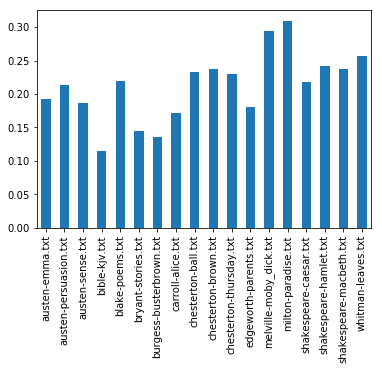

In [60]:
pd.Series(ttrTruncated).plot(kind='bar')

In [62]:
inauguralTTR = {}
for fileid in inaugural.fileids():
    inauguralTTR[fileid[:-4]] = typeTokenRatio(inaugural.words(fileid))

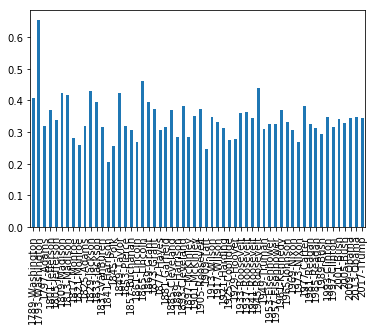

In [64]:
pd.Series(inauguralTTR).plot(kind='bar')

In [69]:
brownCategoriesTTRs = {}
for category in brown.categories():
    words = brown.words(categories=category)
    ttr = typeTokenRatio(words)
    brownCategoriesTTRs[category] = ttr

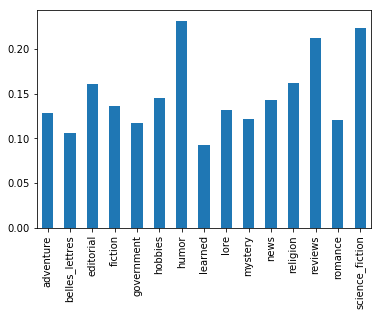

In [70]:
pd.Series(brownCategoriesTTRs).plot(kind='bar')

In [ ]:
# Don't do this!
bet = moonstoneParts[2]
clack = moonstoneParts[4]
betTokens = nltk.word_tokenize(bet)
clackTokens = nltk.word_tokenize(clack)
# Instead, do this: 
allTokens = []
for text in [bet, clack]:
    tokens = nltk.word_tokenize(text)
    allTokens.append(tokens)


# Stylometry

- "Style": most frequent 100-800 words
- "Content": lesser frequent

TF/IDF: term frequency (adjusted for) inverse document frequency

In [71]:
import sklearn # scikit-learn

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [92]:
rawTexts = [gutenberg.raw(fileid) for fileid in gutenberg.fileids()]

In [121]:
tfidf = TfidfVectorizer(tokenizer=nltk.word_tokenize, use_idf=False, max_features=100, min_df=3)

In [122]:
tfMatrix = tfidf.fit_transform(rawTexts)

In [123]:
df = pd.DataFrame(tfMatrix.todense(), columns=tfidf.get_feature_names(), index=gutenberg.fileids())

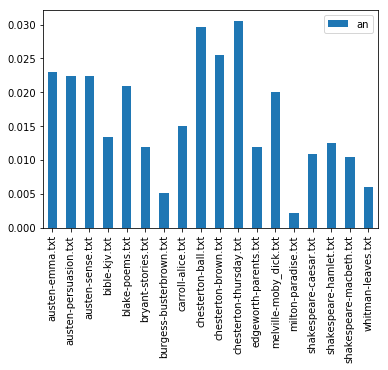

In [124]:
df[['an']].plot(kind='bar')